In [1]:
### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
protein_list = ['TPH1', 'COMT', 'SLC18A2', 'HTR1B', 'HTR2C', 'HTR2A', 'MAOA',
                'TPH2', 'HTR1A', 'HTR7', 'SLC6A4', 'GABBR2', 'POMC', 'GNAI3',
                'NPY', 'ADCY1', 'PDYN', 'GRM2', 'GRM3', 'GABBR1']
proteins = '%0d'.join(protein_list)
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)


In [3]:
# pull the text from the response object and split based on new lines
lines = r.text.split('\n')
# split each line into its components based on tabs
data = [l.split('\t') for l in lines]
# convert to dataframe using the first row as the column names; drop empty, final row
df = pd.DataFrame(data[1:-1], columns=data[0])
# dataframe with the preferred names of the two proteins and the score of the interaction
interactions = df[['preferredName_A', 'preferredName_B', 'score']]
interactions.head()


,preferredName_A,preferredName_B,score
0,TPH1,GRM2,0.411
1,TPH1,GRM2,0.411
2,TPH1,POMC,0.439
3,TPH1,POMC,0.439
4,TPH1,NPY,0.458


In [4]:
G=nx.Graph(name='Protein Interaction Graph')
# G = nx.MultiDiGraph(name='Protein Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph

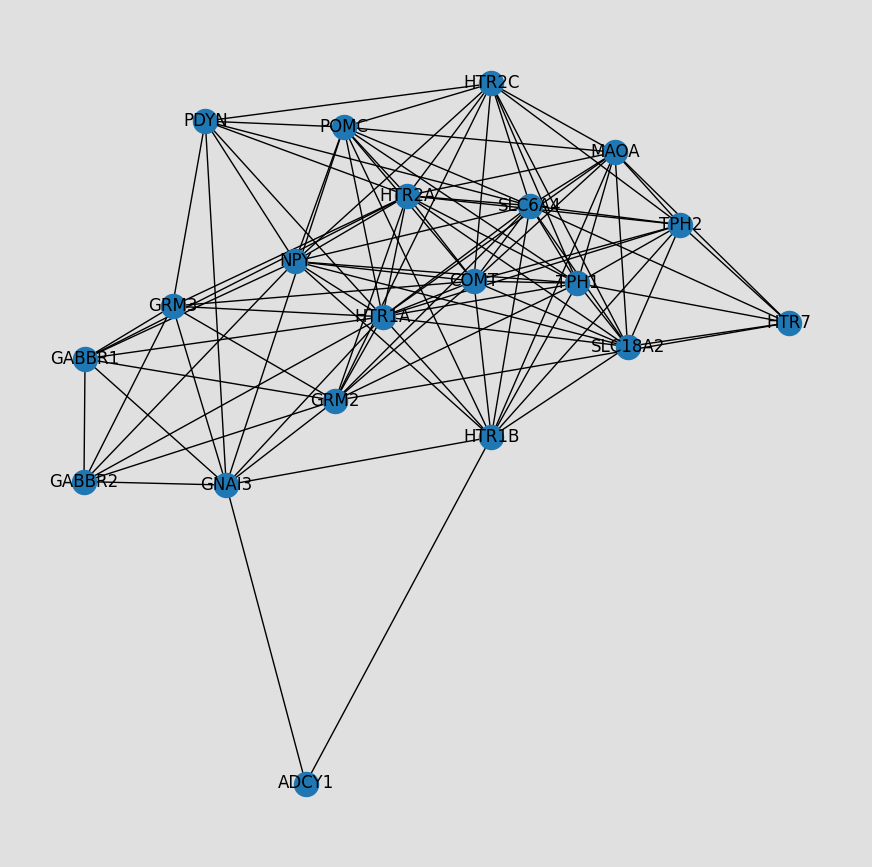

In [5]:
pos = nx.spring_layout(G)  # position the nodes using the spring layout
plt.figure(figsize=(11, 11), facecolor=[0.7, 0.7, 0.7, 0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()


In [6]:
# function to rescale list of values to range [newmin,newmax]
def rescale(l, newmin, newmax):
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]


# use the matplotlib plasma colormap
graph_colormap = cm.get_cmap('plasma', 12)
# node color varies with Degree
c = rescale([G.degree(v) for v in G], 0.0, 0.9)
c = [graph_colormap(i) for i in c]
# node size varies with betweeness centrality - map to range [10,100]
bc = nx.betweenness_centrality(G)  # betweeness centrality
s = rescale([v for v in bc.values()], 1500, 7000)
# edge width shows 1-weight to convert cost back to strength of interaction
ew = rescale([float(G[u][v]['weight']) for u, v in G.edges], 0.1, 4)
# edge color also shows weight
ec = rescale([float(G[u][v]['weight']) for u, v in G.edges], 0.1, 1)
ec = [graph_colormap(i) for i in ec]


C:\Users\musah\AppData\Local\Temp\ipykernel_7432\2023422606.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  graph_colormap = cm.get_cmap('plasma', 12)


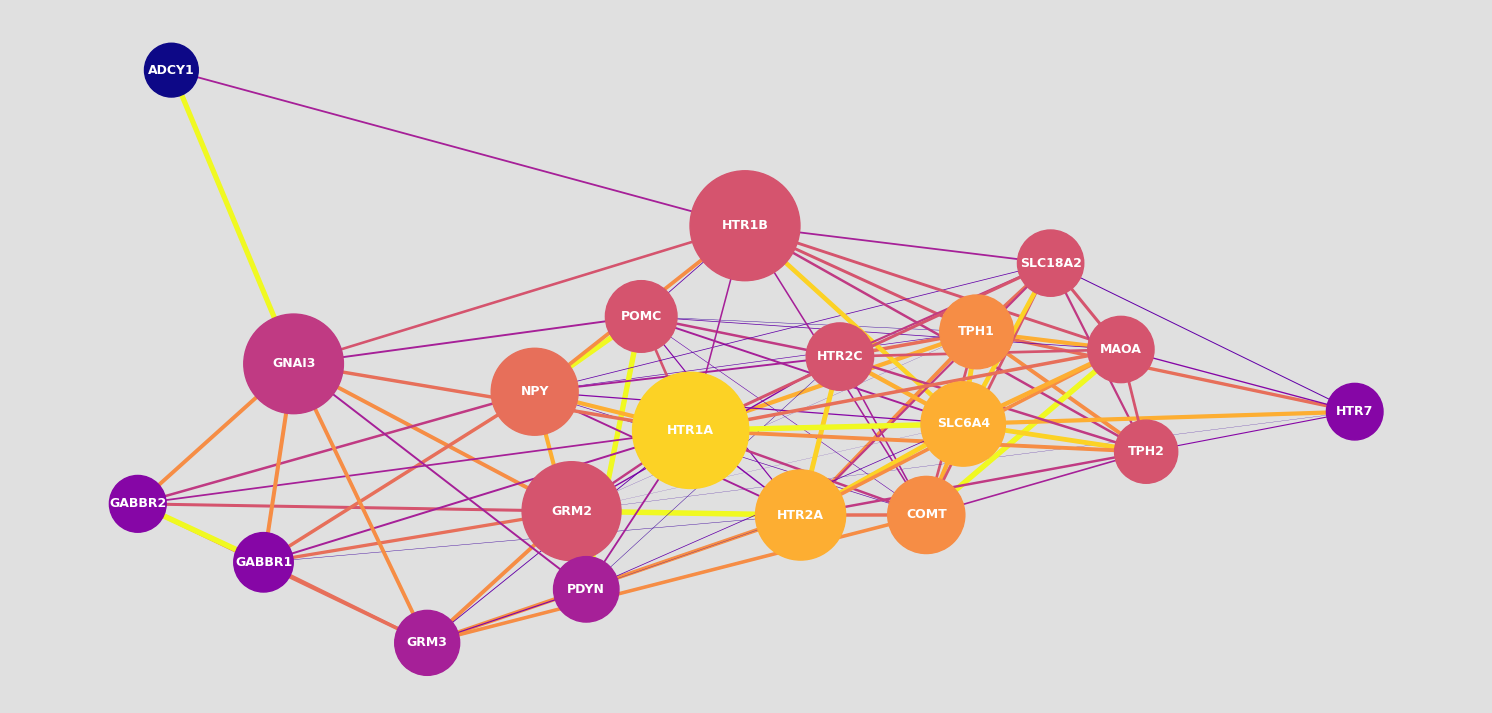

In [7]:
pos = nx.spring_layout(G)
plt.figure(figsize=(19, 9), facecolor=[0.7, 0.7, 0.7, 0.4])
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s, edge_color=ec, width=ew,
                font_color='white', font_weight='bold', font_size='9')
plt.axis('off')
plt.show()


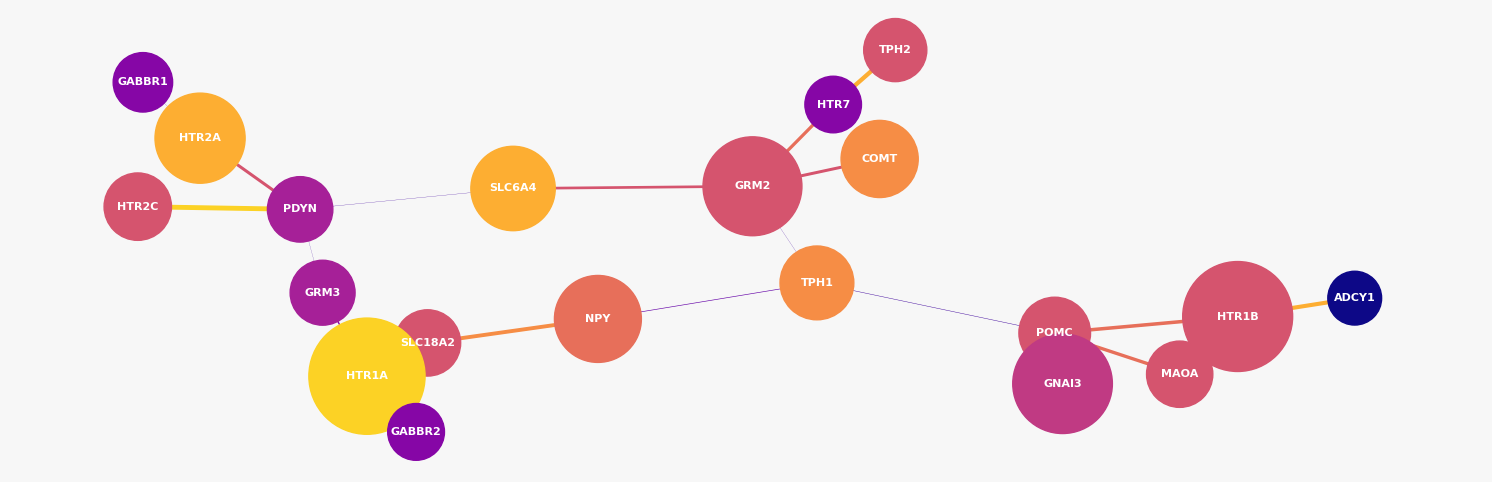

In [8]:
T = nx.minimum_spanning_tree(G)
pos = nx.spring_layout(T) 
plt.figure(figsize=(19, 6), facecolor=[0.7, 0.7, 0.7, 0.1]) 
nx.draw_networkx(
    T, pos=pos, 
    with_labels=True, node_color=c, node_size=s, edge_color=ec, width=ew,
    font_color='white', font_weight='bold', font_size='8')
plt.axis('off')
plt.show() # show the relationship between the proteins available

# add more content on the KG -> Knowledge Graphs